#Импорт Модулей

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree #для визуализации 
from sklearn.tree import DecisionTreeClassifier #для построения
from sklearn.model_selection import train_test_split #для построения
import sklearn.metrics as metrics #для оценки точности

# Считываем данные с файла

In [16]:
seed_ds = pd.read_csv('seeds_dataset.csv', sep='\s+',  
        names=['area A', 'perimeter P', 'compactness C', 'length ', 'width', 'asymmetry koeff', 'length of kernel groove', 'groove'], engine='python')

seed_ds

,area A,perimeter P,compactness C,length,width,asymmetry koeff,length of kernel groove,groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
206,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
207,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
208,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


Проверка на пустые значения в колонках

In [17]:
seed_ds.isnull().sum()

area A                     0
perimeter P                0
compactness C              0
length                     0
width                      0
asymmetry koeff            0
length of kernel groove    0
groove                     0
dtype: int64

создаем описательную статистику по столбцам
число записей, среднее значение, мин, макс...

In [18]:
seed_ds.describe()

,area A,perimeter P,compactness C,length,width,asymmetry koeff,length of kernel groove,groove
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


# Построение дерева

In [19]:
# делим на данные и ответы
X = seed_ds.iloc[:,:-1]
Y = seed_ds.iloc[:,-1]

In [20]:
X.head()

,area A,perimeter P,compactness C,length,width,asymmetry koeff,length of kernel groove
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [21]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: groove, dtype: int64

In [29]:
# 1
#получаем обучающую и тестовую (test_size 20%) выборку 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state = 1)
#создаем классификатор
# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
dTree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=3)
#обучаем
dTree.fit(X_train, Y_train)
#предсказываем
Y_pred=dTree.predict(X_test)
Y1_pred = dTree.predict(X)
print("Точность:",metrics.accuracy_score(Y_test, Y_pred))
print("Точность:",metrics.accuracy_score(Y, Y1_pred))

Точность: 0.9761904761904762
Точность: 0.9714285714285714


In [34]:
# 2
#получаем обучающую и тестовую (test_size 40%) выборку 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)
#создаем классификатор
# параметр min_samples_leaf указывает, при каком минимальном количестве
# элементов в узле он будет дальше разделяться
dTree = DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=3, random_state = 6)
#обучаем
dTree.fit(X_train, Y_train)
#предсказываем
Y_pred=dTree.predict(X_test)
Y1_pred = dTree.predict(X)
print("Точность:",metrics.accuracy_score(Y_test, Y_pred))
print("Точность:",metrics.accuracy_score(Y, Y1_pred))

Точность: 0.9285714285714286
Точность: 0.9666666666666667


In [35]:
# 3
#получаем обучающую и тестовую (test_size 10%) выборку 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state = 1)
#создаем классификатор
dTree = DecisionTreeClassifier(criterion='entropy',splitter = 'random', max_depth=7)
#обучаем
dTree.fit(X_train, Y_train)
#предсказываем
Y_pred=dTree.predict(X_test)
Y1_pred = dTree.predict(X)
print("Точность:",metrics.accuracy_score(Y_test, Y_pred))
print("Точность:",metrics.accuracy_score(Y, Y1_pred))

Точность: 0.9523809523809523
Точность: 0.9857142857142858


In [39]:
# 4
#получаем обучающую и тестовую (test_size 25%) выборку 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state = 1)
#создаем классификатор
dTree = DecisionTreeClassifier()
#обучаем
dTree.fit(X_train, Y_train)
#предсказываем
Y_pred=dTree.predict(X_test)
Y1_pred = dTree.predict(X)
print("Точность:",metrics.accuracy_score(Y_test, Y_pred))
print("Точность:",metrics.accuracy_score(Y, Y1_pred))

Точность: 0.9811320754716981
Точность: 0.9952380952380953


[Text(221.55882352941177, 203.85, 'X[6] <= 5.576\ngini = 0.666\nsamples = 157\nvalue = [50, 55, 52]'),
 Text(147.7058823529412, 176.67000000000002, 'X[0] <= 13.435\ngini = 0.518\nsamples = 103\nvalue = [49, 2, 52]'),
 Text(98.47058823529412, 149.49, 'X[6] <= 4.789\ngini = 0.288\nsamples = 63\nvalue = [11, 0, 52]'),
 Text(59.082352941176474, 122.31, 'X[3] <= 4.996\ngini = 0.278\nsamples = 6\nvalue = [5, 0, 1]'),
 Text(39.38823529411765, 95.13, 'X[0] <= 11.95\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(19.694117647058825, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(59.082352941176474, 67.94999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(78.7764705882353, 95.13, 'gini = 0.0\nsamples = 4\nvalue = [4, 0, 0]'),
 Text(137.85882352941178, 122.31, 'X[5] <= 1.538\ngini = 0.188\nsamples = 57\nvalue = [6, 0, 51]'),
 Text(118.16470588235295, 95.13, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]'),
 Text(157.5529411764706, 95.13, 'X[0] <= 12.71\ng

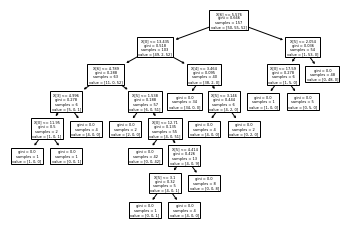

In [40]:
tree.plot_tree(dTree)

In [41]:
# 5
#получаем обучающую и тестовую (test_size 25%) выборку 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)
#создаем классификатор
dTree = DecisionTreeClassifier(splitter = 'random', max_depth = 5, min_samples_leaf=4, random_state = 5)
#обучаем
dTree.fit(X_train, Y_train)
#предсказываем
Y_pred=dTree.predict(X_test)
Y1_pred = dTree.predict(X)
print("Точность:",metrics.accuracy_score(Y_test, Y_pred))
print("Точность:",metrics.accuracy_score(Y, Y1_pred))

Точность: 0.9245283018867925
Точность: 0.919047619047619


# Визуализация дерева

[Text(157.5529411764706, 199.32, 'X[1] <= 14.748\ngini = 0.665\nsamples = 157\nvalue = [48, 56, 53]'),
 Text(78.7764705882353, 163.07999999999998, 'X[4] <= 3.102\ngini = 0.491\nsamples = 89\nvalue = [35, 1, 53]'),
 Text(39.38823529411765, 126.83999999999999, 'X[5] <= 1.798\ngini = 0.285\nsamples = 58\nvalue = [10, 0, 48]'),
 Text(19.694117647058825, 90.6, 'gini = 0.375\nsamples = 4\nvalue = [3, 0, 1]'),
 Text(59.082352941176474, 90.6, 'X[5] <= 3.367\ngini = 0.226\nsamples = 54\nvalue = [7, 0, 47]'),
 Text(39.38823529411765, 54.359999999999985, 'gini = 0.49\nsamples = 7\nvalue = [4, 0, 3]'),
 Text(78.7764705882353, 54.359999999999985, 'X[0] <= 12.068\ngini = 0.12\nsamples = 47\nvalue = [3, 0, 44]'),
 Text(59.082352941176474, 18.119999999999976, 'gini = 0.0\nsamples = 28\nvalue = [0, 0, 28]'),
 Text(98.47058823529412, 18.119999999999976, 'gini = 0.266\nsamples = 19\nvalue = [3, 0, 16]'),
 Text(118.16470588235295, 126.83999999999999, 'X[3] <= 5.208\ngini = 0.323\nsamples = 31\nvalue = [25

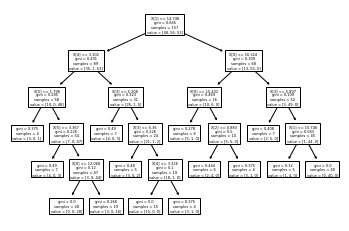

In [28]:
tree.plot_tree(dTree)